In [ ]:
# # Main paper used for this Hybrid chaotic encryption algorithm
# ### https://doi.org/10.1007/978-3-319-77383-4_87

In [1]:
import tifffile
import numpy as np
from module import *
import time
import glob
from IPython.utils import io
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (28,6)

In [2]:
tifFile = "NDVI_Encrypted.tif"
OriginalNDVIArray = tifffile.imread("NDVI_Original.tif")

EncryptedNdviArray = tifffile.imread(tifFile)
EncryptedNdviFlat = EncryptedNdviArray.flatten()
rows, cols = EncryptedNdviArray.shape
arrayLength = rows*cols

In [3]:

def Logistic(mu, x0):
    LogisticMap = np.full(arrayLength, np.nan)
    LogisticMap[0] = x0 
    for i in range(1, arrayLength):
        LogisticMap[i] = mu * LogisticMap[i-1]*(1-LogisticMap[i-1])
    return LogisticMap

def Chebyshev(k,x0):
    ChebyshevMap = np.full(arrayLength, np.nan)
    ChebyshevMap[0] = x0 
    for i in range(1, arrayLength):
        ChebyshevMap[i] = np.cos(k*np.arccos(ChebyshevMap[i-1]))
    return ChebyshevMap
    
def Hybrid(LogisticMap, ChebysehvMap):
    dotProd = LogisticMap * ChebysehvMap
    return dotProd

In [4]:
HashInt = hashKeyInt("ashish240")
hash_0to1 = Hash0to1(HashInt)

# It is the default & fixed range for this encryption to work.
float_mu = muFloatRange(hash_0to1)

#Starting seed value for X0 range[0,1]
xIniFloat = hash_0to1

# K >= 2 for chaotic state.
kFloat = kFloatRange(hash_0to1)

LogisticMap = Logistic(float_mu, hash_0to1)
ChebyshevMap = Chebyshev(kFloat, hash_0to1)
HybridMap = Hybrid(LogisticMap, ChebyshevMap)

# Generate blank decrypted NDVI.
decryptedNDVI = np.full(arrayLength, np.nan)

In [5]:
for i in range(0, arrayLength):
    float1 = EncryptedNdviFlat[i]
    float2 = HybridMap[i]
    # Convert floats to 32-bit binary representations
    if np.isnan(float1):
        continue
    binary1 = int(bin(convert2Int(float1)),2)
    binary2 = int(bin(convert2Int(float2)),2)
    floatXor = binary1 ^ binary2
    decryptedNDVI[i] = convertBack(floatXor)

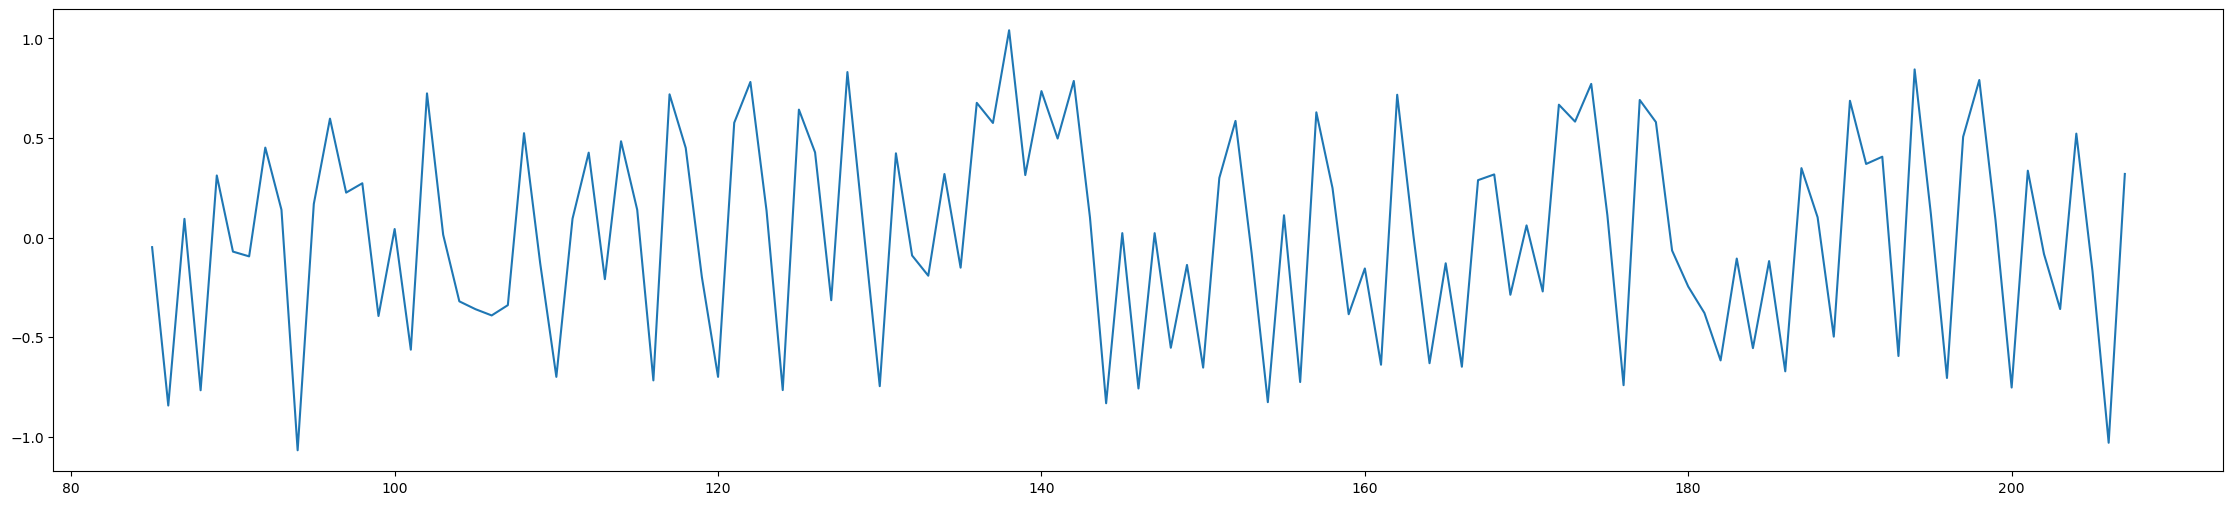

In [6]:
plt.plot(EncryptedNdviFlat[6000:6500])
plt.savefig("NDVI_points_encry_v2.png")

In [7]:
# plt.plot(decryptedNDVI[6000:6500])
# plt.savefig("NDVI_Decrypted_points_V2.png")
# # plt.close()



In [8]:
ndviDecryptedArray = decryptedNDVI.reshape(rows,cols)
tifffile.imwrite("NDVI_Decrypted.tif",ndviDecryptedArray)
tifffile.imwrite("NDVI_Original_Encrypted.tif",EncryptedNdviArray)

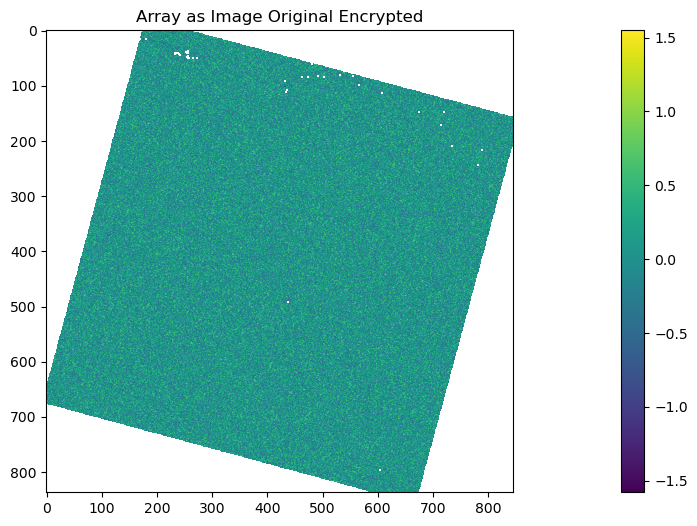

In [9]:
# Display the array as an image
plt.imshow(EncryptedNdviArray, cmap='viridis')  # 'viridis' is just an example colormap, you can choose another
plt.title('Array as Image Original Encrypted')
plt.colorbar()  # Add a colorbar for reference

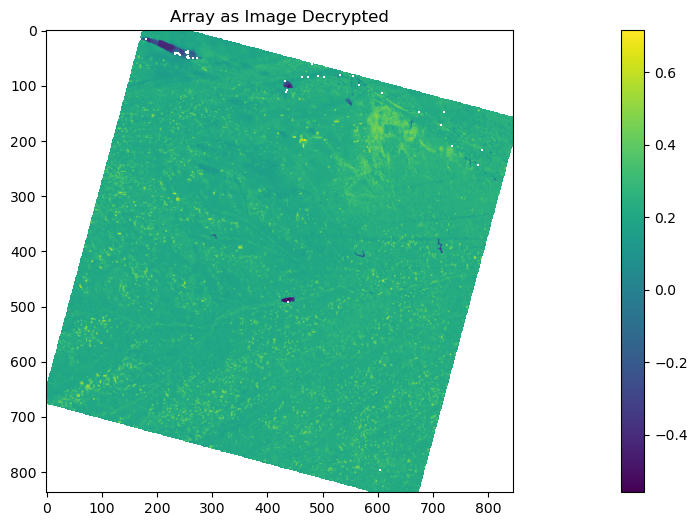

In [10]:
# Display the array as an image
plt.imshow(ndviDecryptedArray, cmap='viridis')  # 'viridis' is just an example colormap, you can choose another
plt.title('Array as Image Decrypted')
plt.colorbar()  # Add a colorbar for reference
plt.show()

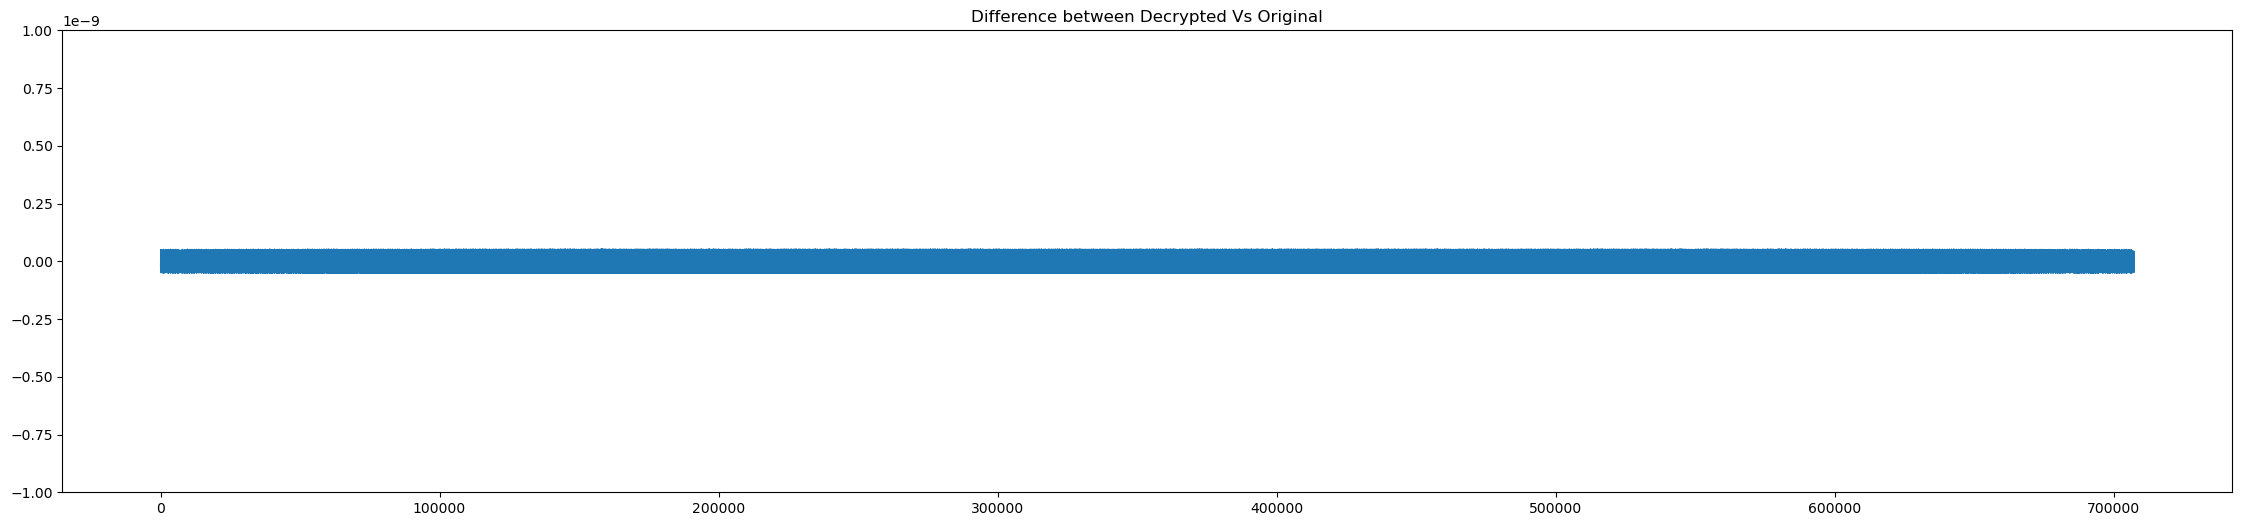

In [11]:
plt.plot(decryptedNDVI- OriginalNDVIArray.flatten())
plt.ylim(-1E-9,1E-9)
plt.title('Difference between Decrypted Vs Original')
plt.show()